In [4]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [28]:
wav_file = '../data/wav/BASIC5000_0001.wav'

frame_size = 25
frame_shift = 10

with wave.open(wav_file, 'rb') as wav:
    sampleing_frequency = wav.getframerate()
    num_samples = wav.getnframes()
    waveform = wav.readframes(num_samples)
    waveform = np.frombuffer(waveform, dtype=np.int16)
    
frame_size = int(sampleing_frequency * frame_size * 0.0001)
frame_shift = int(sampleing_frequency * frame_shift * 0.001)

print(f"frame_size  = {frame_size}")
print(f"frame_shift = {frame_shift}")
#FFTを行うサンプル数をフレームサイズ以上の2条の設定
fft_size = 1
while fft_size < frame_size:
    fft_size *= 2

print(f"fft_size = {fft_size}")
num_frames = (num_samples - frame_size) // frame_shift + 1
#スペクトログラム行列を用意
spectrogram = np.zeros((num_frames, int(fft_size / 2) + 1))    

for frame_idx in range(num_frames):
    #分析の開始はフレーム番号*frame_shift
    start_index = frame_idx * frame_shift 
    
    #1フレーム分の波形を抽出
    frame = waveform[start_index : start_index + frame_size].copy()
    #ハミング窓をかける
    frame = frame * np.hamming(frame_size)
    spectrum = np.fft.fft(frame, n = fft_size)
    
    #振幅スペクトラムを計算
    absolute = np.abs(spectrum)
    #左右対称なので片側だけを用いる
    absolute = absolute[:int(fft_size / 2) + 1]
    log_absolute = np.log(absolute + 1E-7)
    
    spectrogram[frame_idx, :] = log_absolute

print(spectrogram.shape)    

frame_size  = 40
frame_shift = 160
fft_size = 64
(319, 33)


Text(0, 0.5, 'Frequency [Hz]')

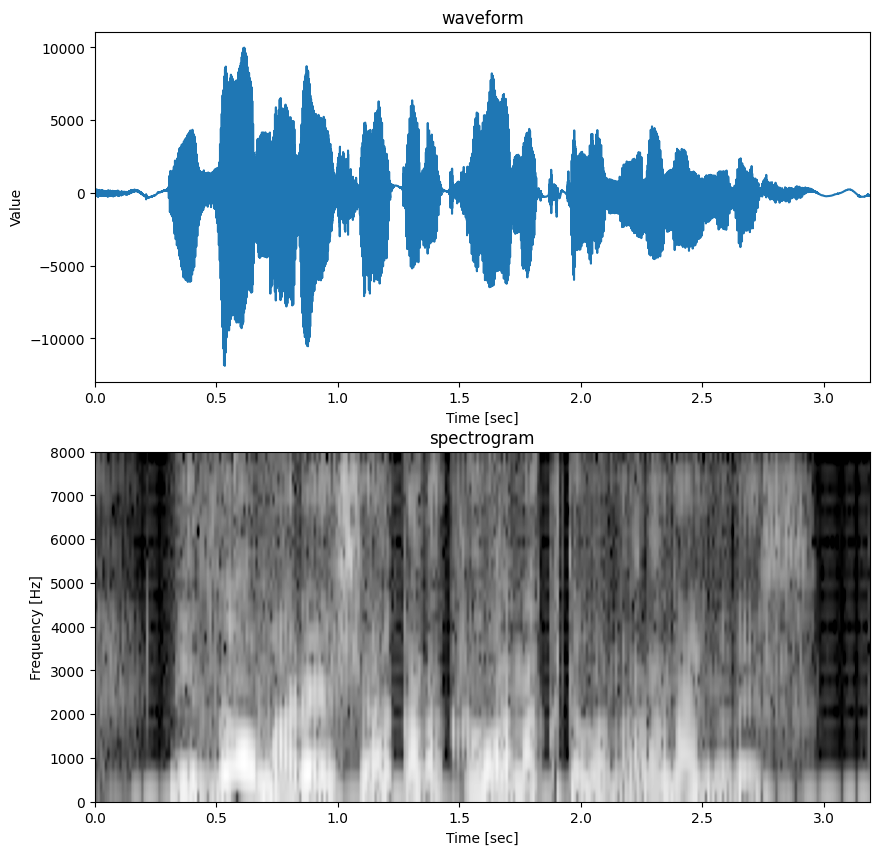

In [27]:
# プロットの描画領域を作成
plt.figure(figsize=(10,10))

# 描画領域を縦に2分割し、
# 上側に時間波形をプロットする
plt.subplot(2, 1, 1)

# 横軸(時間軸)を作成する
time_axis = np.arange(num_samples) / sampleing_frequency 

# 時間波形のプロット
plt.plot(time_axis, waveform)

# プロットのタイトルと、横軸と縦軸のラベルを定義
plt.title('waveform')
plt.xlabel('Time [sec]')
plt.ylabel('Value')

# 横軸の表示領域を0から波形終了時刻に制限
plt.xlim([0, num_samples / sampleing_frequency])

# 2分割された描画領域の下側に
# スペクトログラムをプロットする
plt.subplot(2, 1, 2)

# スペクトログラムの最大値を0に合わせて
# カラーマップのレンジを調整
spectrogram -= np.max(spectrogram)
vmax = np.abs(np.min(spectrogram)) * 0.0
vmin = - np.abs(np.min(spectrogram)) * 0.7

# ヒストグラムをプロット
plt.imshow(spectrogram.T[-1::-1,:], 
            extent=[0, num_samples / sampleing_frequency, 
                    0, sampleing_frequency / 2],
            cmap = 'gray',
            vmax = vmax,
            vmin = vmin,
            aspect = 'auto')

# プロットのタイトルと、横軸と縦軸のラベルを定義
plt.title('spectrogram')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

# プロットを保存する